## Data specification

Wine Quality Data Set[1] used in this assignment was downloaded from https://archive.ics.uci.edu/ml/datasets/Wine+Quality Two datasets were included. File winequality-red.csv cantains red wine preference samples and file winequality-white.csv contains white wine preference samples. Datasets are related to "Vinho Verde" wine which comes from Minho region of Portugal. They are collected by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. The data were collected from May/2004 to February/2007 using only protected designation of origin samples that were tested at the official certification entity (CVRVV). The CVRVV is an inter-professional organization with the goal of improving the quality and marketing of vinho verde. The data were recorded by a computerized system (iLab), which automatically manages the process of wine sample testing from producer requests to laboratory and sensory analysis. Each entry denotes a given test (analytical or sensory) and the final database was exported into a single sheet (.csv).

In [2]:
import pandas as pd
white_wine = pd.read_csv('winequality-white.csv', sep = ';')
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In our project, we focus on white wine data set. The white wind data contains 12 columns which are 
Input X:       
1 - fixed acidity (tartaric acid - g / dm^3)
2 - volatile acidity (acetic acid - g / dm^3)
3 - citric acid (g / dm^3)
4 - residual sugar (g / dm^3)
5 - chlorides (sodium chloride - g / dm^3
6 - free sulfur dioxide (mg / dm^3)
7 - total sulfur dioxide (mg / dm^3)
8 - density (g / cm^3)
9 - pH
10 - sulphates (potassium sulphate - g / dm3)
11 - alcohol (% by volume)   
All input X:s (based on physicochemical tests) are numerical continuous data          
Target Y:       
12 - quality : A integer between 0 and 10          
Target Y (based on sensory data) is categorical ordinal data. 

In [3]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset does not contain null value. We also need to check if there is any duplicated data point in the data set. 

In [4]:
white_wine.duplicated().sum()

937

We remove these duplicated data points.

In [5]:
white_wine_clean = white_wine.drop_duplicates()
white_wine_clean.duplicated().sum()

0

In [6]:
# Split original DataFrame into training_validation and testing sets
training_validation = white_wine_clean.sample(frac=0.8,random_state=0)
testing = white_wine_clean.drop(training_validation.index)
# Split training_validation into training and validation sets
training = training_validation.sample(frac=0.8,random_state=0)
validation = training_validation.drop(training.index)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def quantiles(data, n):
    return [data.quantile((i+1)/(n)) for i in range(n) ]

def q_q_plot(data1, data2, n, name):
    data1_quantiles = quantiles(data1, n)
    data2_quantiles = quantiles(data2, n)
    min_datas = min(data1_quantiles[0], data2_quantiles[0])
    max_datas = max(data1_quantiles[-1], data2_quantiles[-1])
    plt.figure()
    plt.scatter(data1_quantiles, data2_quantiles)
    plt.xlabel('training data')
    plt.ylabel('validation data')
    plt.plot([min_datas, max_datas], [min_datas, max_datas], c = 'red')
    plt.title(name)
    plt.show()
    plt.close()

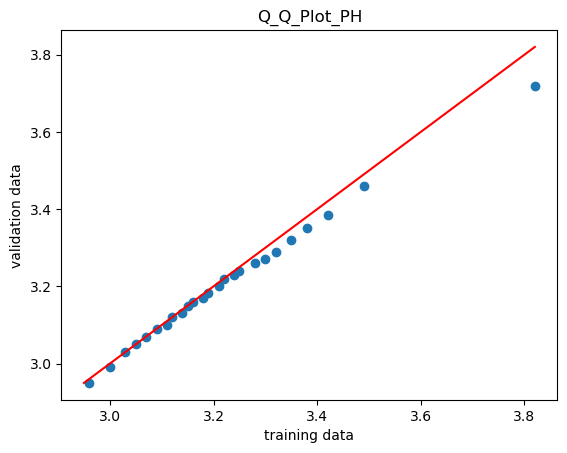

In [10]:
q_q_plot(training.pH, validation.pH, 25, "Q_Q_Plot_PH")

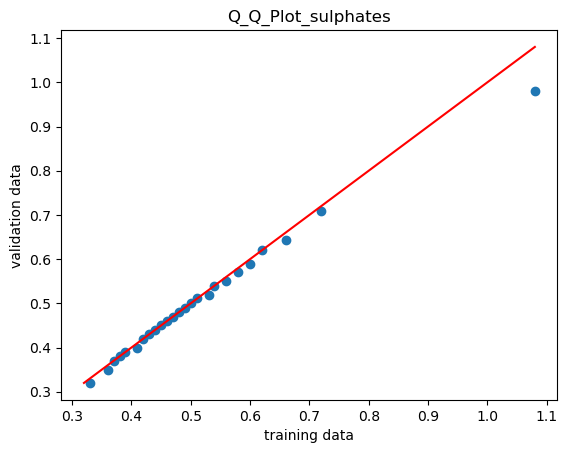

In [11]:
q_q_plot(training.sulphates, validation.sulphates, 25, "Q_Q_Plot_sulphates")

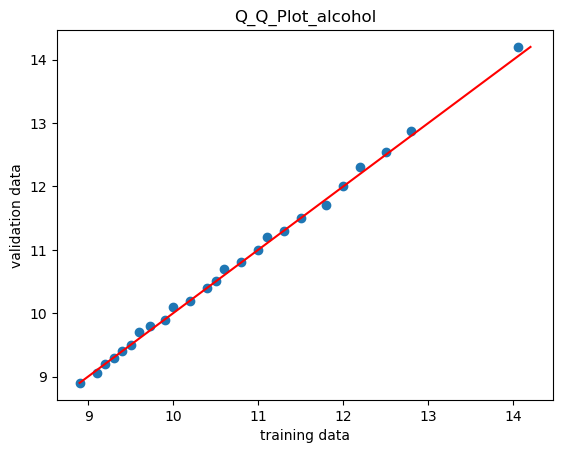

In [12]:
q_q_plot(training.alcohol, validation.alcohol, 25, "Q_Q_Plot_alcohol")

**These outputs are not as similiar as the ones in your original attemp. Two possible explanations: 1. There is a problem with your data segmentation or 2. Q-Q plot function is not correct. I am going to check it. I feel the outputs here should be reasonable. The data from training and validation datasets should follow the same distribution.**

The distributions of the training and validation data for ph and sulfates are exactly the same: their q_q plots are linear and have an angle of 45 degrees.
The alcohol q-q plot is a little less linear, it is possible that the data is not independent and identically distributed ...

Define a problem 

In this project we are going to use alcohol, suphates and pH levels from the white wine dataset to predict the quality of wines.

In [8]:
training_dataset = pd.read_csv('winequality-white.csv', sep = ';')

**Here, I create a PairGrid plot in order to see the relationship betwen two variables. It is not easy to find out correlation here.** 

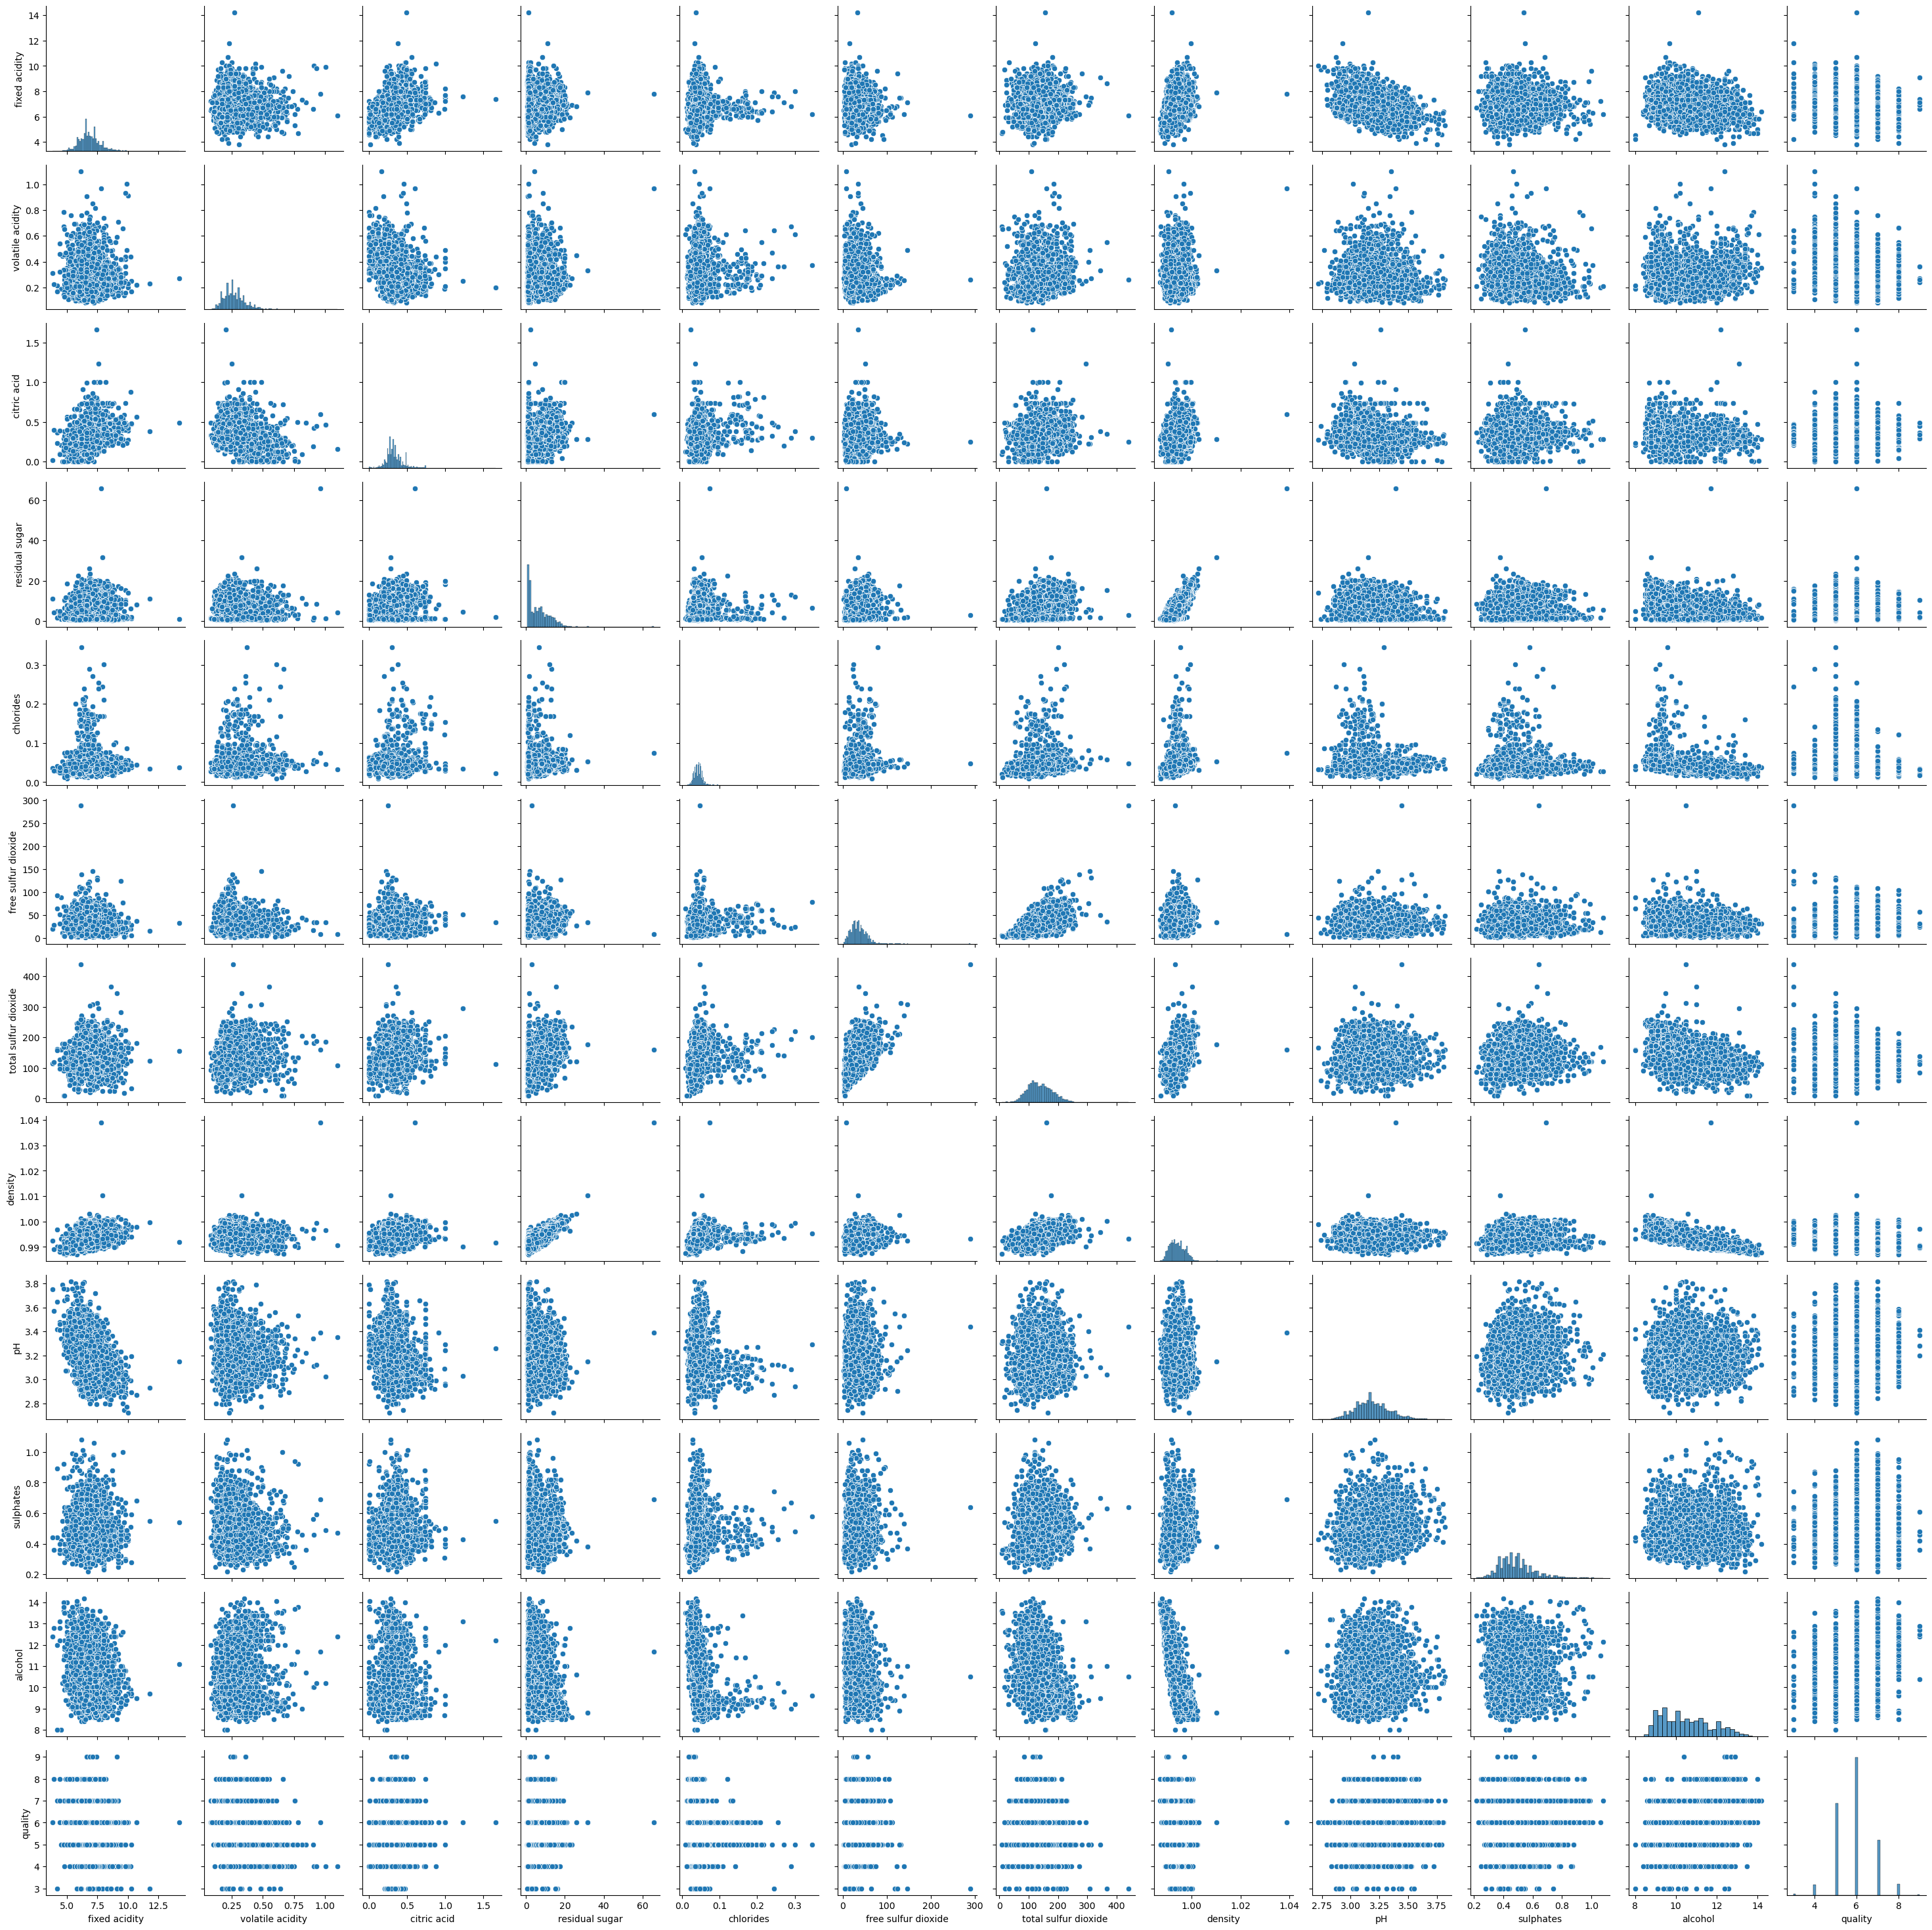

In [9]:
import seaborn as sns
g = sns.PairGrid(training_dataset)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)


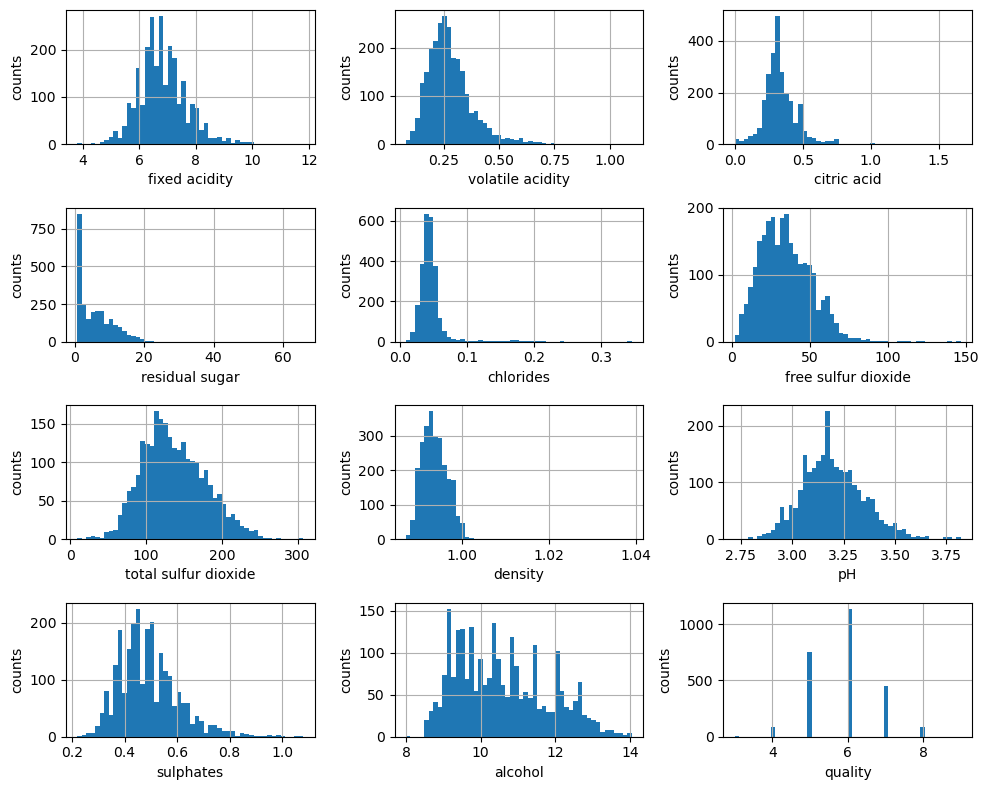

In [8]:
import seaborn as sns
color = sns.color_palette()
colunm = training.columns.tolist() 
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(4,3,i+1)
    training[colunm[i]].hist(bins=50,color=color[0])
    plt.xlabel(colunm[i],fontsize=10)
    plt.ylabel('counts', fontsize=10)
plt.tight_layout()
plt.show()

According to the above plot, we can see the acidity mainly depends on fixed acidity, free sulfur dioxide and total sulfur dioxide. 

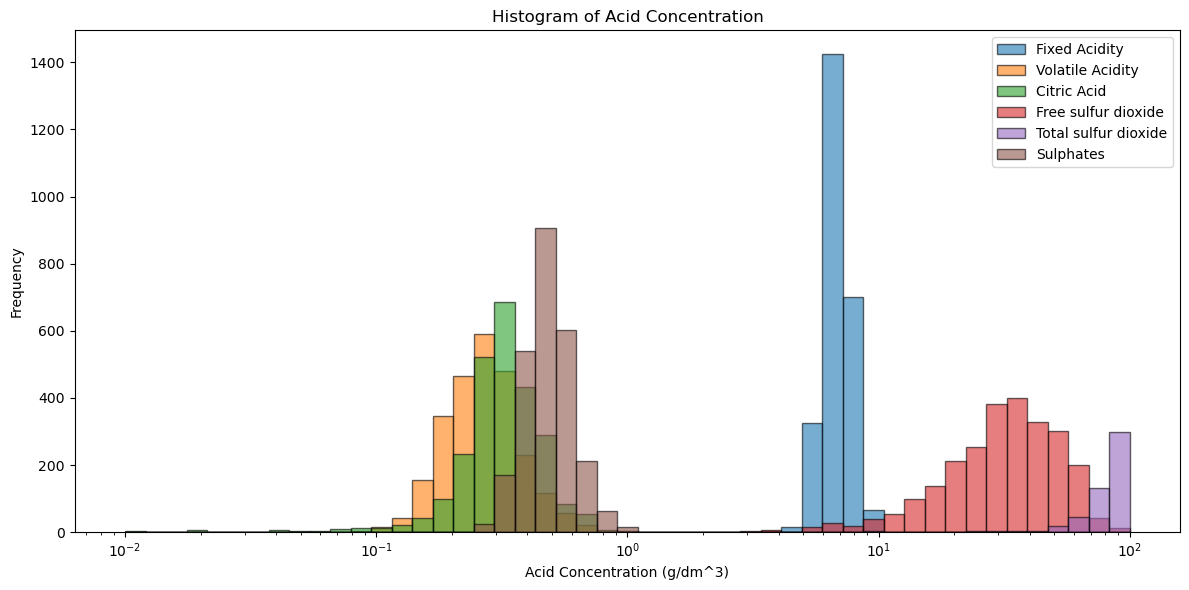

In [15]:
plt.figure(figsize = (12,6))

bins = 10 ** (np.linspace(-2, 2))
plt.hist(training['fixed acidity'], bins = bins, edgecolor = 'k', label = 
        'Fixed Acidity', alpha=0.6)
plt.hist(training['volatile acidity'], bins = bins, edgecolor = 'k', label = 
        'Volatile Acidity', alpha=0.6)
plt.hist(training['citric acid'], bins = bins, edgecolor = 'k', alpha = 0.6,
        label = 'Citric Acid')
plt.hist(training['free sulfur dioxide'], bins = bins, edgecolor = 'k', alpha = 0.6,
        label = 'Free sulfur dioxide')
plt.hist(training['total sulfur dioxide'], bins = bins, edgecolor = 'k', alpha = 0.6,
        label = 'Total sulfur dioxide')
plt.hist(training['sulphates'], bins = bins, edgecolor = 'k', alpha = 0.6,
        label = 'Sulphates')

plt.xscale('log')
plt.xlabel('Acid Concentration (g/dm^3)')
plt.ylabel('Frequency')
plt.title('Histogram of Acid Concentration')
plt.legend()
plt.tight_layout()

We create a total acid column. 

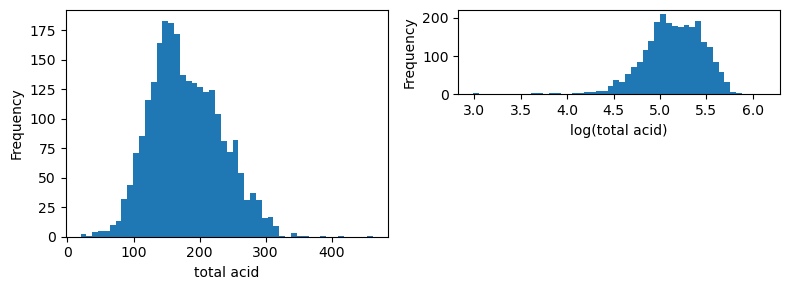

In [18]:
training['total acid'] = training['fixed acidity'] + training['volatile acidity'] + training['citric acid'] +\
                training['free sulfur dioxide'] + training['total sulfur dioxide'] + training['sulphates']

plt.figure(figsize = (8, 3))

plt.subplot(121)
plt.hist(training['total acid'], bins = 50, color = color[0])
plt.xlabel('total acid')
plt.ylabel('Frequency')
plt.subplot(222)
plt.hist(np.log(training['total acid']), bins = 50, color = color[0])
plt.xlabel('log(total acid)')
plt.ylabel('Frequency')

plt.tight_layout()

Figure 6: Sweetness


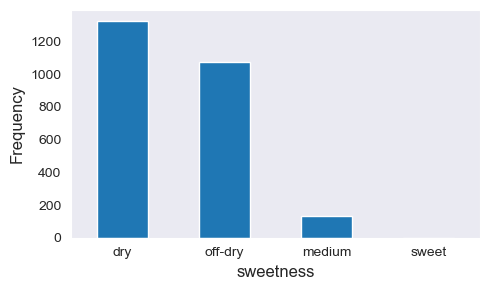

In [26]:
training['sweetness'] = pd.cut(training['residual sugar'], bins = [0, 5, 15, 45, 150], 
                         labels=["dry", "off-dry", "medium", "sweet"]) # [2]

plt.figure(figsize = (5,3))
training['sweetness'].value_counts().plot(kind = 'bar', color = color[0])
plt.xticks(rotation=0)
plt.xlabel('sweetness', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.tight_layout()
print("Figure 6: Sweetness")

In [24]:
training['residual sugar'].describe()

count    2535.000000
mean        5.945325
std         4.958239
min         0.700000
25%         1.600000
50%         4.800000
75%         9.050000
max        65.800000
Name: residual sugar, dtype: float64

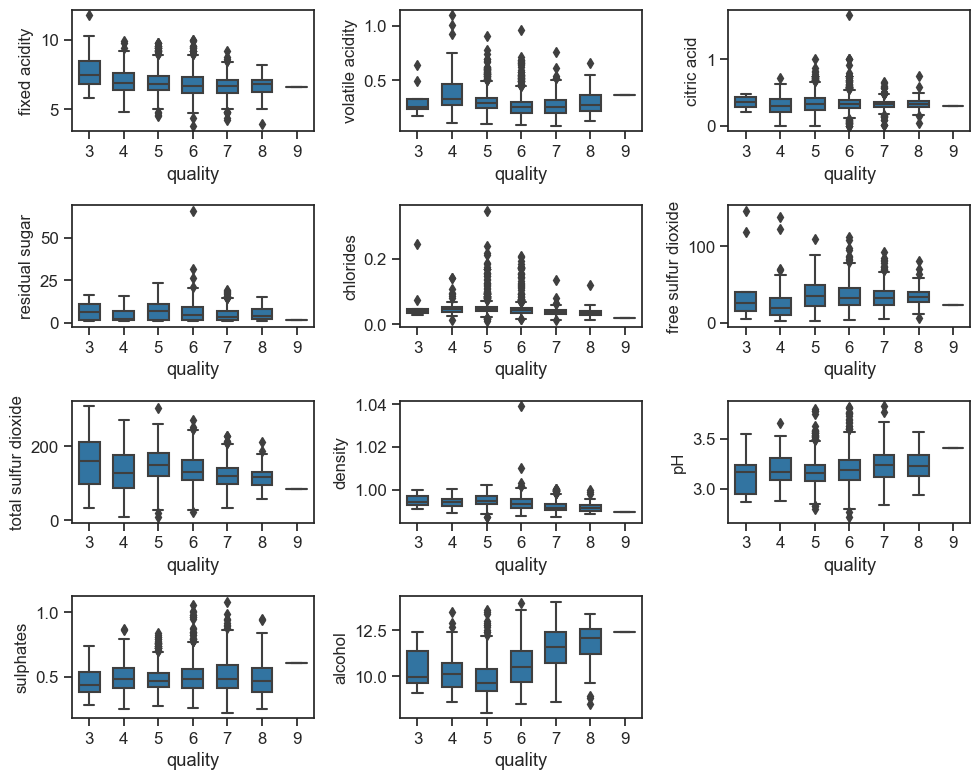

In [22]:
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.1)
colunm = training.columns.tolist()[:11]
plt.figure(figsize=(10, 8))
for i in range(11):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='quality', y=colunm[i],data=training,color=color[0], width=0.6)
    plt.ylabel(colunm[i], fontsize=12)
plt.tight_layout()
plt.show()

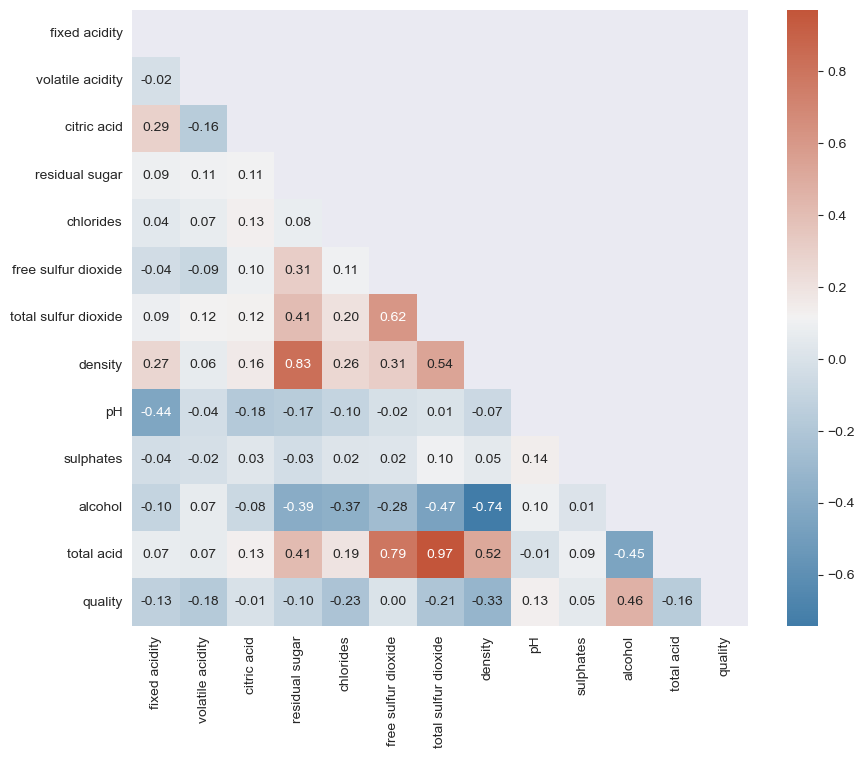

In [22]:
sns.set_style("dark")
plt.figure(figsize=(10, 8))
colunm = training.columns.tolist()[:11] + ['total acid','quality']
mcorr = training[colunm].corr()
mask = np.zeros_like(mcorr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 20, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
plt.show()

References:            
[1] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.               
[2] Just Wine. How much sugar is in my wine? https://justwineapp.com/article/how-much-sugar-is-in-my-wine [2022-12-20]